The pitch :

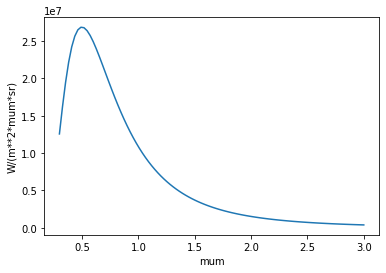

In [53]:
import numpy as np
import matplotlib.pyplot as plt

import physipy
from physipy import units, constants, set_favunit, setup_matplotlib
from physipy import m, kg, K, sr

# reading units and constants
W = units["W"]
mum = units["mum"]
hp = constants["Planck"]
c = constants["c"]
kB = constants["k"]

# common unit for convinience
Wm2srmum = W/(m**2*sr*mum)

# create a function, and attach a favorite unit (for display)
@set_favunit(Wm2srmum)
def planck_W(wl, T):
    return 2*hp*c**2/(wl**5) * 1/(np.exp(hp*c/(wl*kB*T))-1)/sr

# create scalar with unit
T_bb = 5800*K

# create an array with unit
ech_wl = np.linspace(0.3, 3, 100)*mum 
ech_wl.favunit = mum

# activate favunit handling for automatic plot axis label
setup_matplotlib()

plt.plot(ech_wl, planck_W(ech_wl, T_bb))


# A quickstart on physipy
Homepage of project : [physipy](https://github.com/mocquin/physipy)

In [1]:
import numpy as np

import physipy

## Dimension object

The Dimension object is basically a dictionnary that stores the dimensions' name and power. A dimension can be created different ways :

In [2]:
a_length_dimension = physipy.Dimension("L")
print(a_length_dimension)
a_length_dimension

L


<Dimension : {'L': 1, 'M': 0, 'T': 0, 'I': 0, 'theta': 0, 'N': 0, 'J': 0, 'RAD': 0, 'SR': 0}>

In [3]:
a_speed_dimension = physipy.Dimension({"L": 1, "T":-1})
print(a_speed_dimension)
a_speed_dimension

L/T


<Dimension : {'L': 1, 'M': 0, 'T': -1, 'I': 0, 'theta': 0, 'N': 0, 'J': 0, 'RAD': 0, 'SR': 0}>

Dimensions can be multiplied and divided as expected : 

In [4]:
product_dim = a_length_dimension * a_speed_dimension
print(product_dim)
product_dim

L**2/T


<Dimension : {'L': 2, 'M': 0, 'T': -1, 'I': 0, 'theta': 0, 'N': 0, 'J': 0, 'RAD': 0, 'SR': 0}>

In [5]:
div_dim = a_length_dimension / a_speed_dimension
print(div_dim)
div_dim

T


<Dimension : {'L': 0, 'M': 0, 'T': 1, 'I': 0, 'theta': 0, 'N': 0, 'J': 0, 'RAD': 0, 'SR': 0}>

You can display a dimension in terms of corresponding SI unit (returns a string) :

In [6]:
print(a_length_dimension.str_SI_unit()) # meters
print(a_speed_dimension.str_SI_unit()) # meters/second

m
m/s


Other operations are avalaible : 

In [7]:
print((a_length_dimension**2).str_SI_unit())
print(a_length_dimension == a_speed_dimension)
print((1/a_length_dimension).str_SI_unit())

m**2
False
1/m


## Quantity object

The Quantity class is simply the association of a numerical value, and a dimension. It can be created several ways :

In [8]:
yo_mama_weight = physipy.Quantity(2000, physipy.Dimension("M"))
print(yo_mama_weight)

2000 kg


In [9]:
yo_papa_weight = 2000 * physipy.kg
print(yo_papa_weight)

2000 kg


In [10]:
print(yo_mama_weight == yo_papa_weight)

True


If dimension analysis allows it, you can perform standard operations on and between Quantity objects :

In [11]:
print(yo_mama_weight + yo_papa_weight)

4000 kg


In [12]:
# speed of light
c = physipy.constants["c"]
E_mama = yo_mama_weight * c**2
print(E_mama)

1.7975103574736352e+20 kg*m**2/s**2


## Unit conversion and displaying

You can change the unit a Quantity displays by changing its ```favunit``` attribute, which means "favorite unit". It default to ```None```which displays the Quantity in SI-units.

In [13]:
print(yo_mama_weight.favunit)

None


In [14]:
# displaying in SI-unit, kg
print(yo_mama_weight)

2000 kg


In [15]:
# changing the favunit
g = physipy.units["g"]
yo_mama_weight.favunit = g

In [16]:
# now displayed in grams
print(yo_mama_weight)

2000000.0 g


Another example : 

In [17]:
speed_of_light = c
print(c)

299792458.0 m/s


In [18]:
mile = physipy.imperial_units["mil"]
one_hour = physipy.units["h"]
retarded_speed_unit = mile / one_hour
print(c.to(retarded_speed_unit))

4.249026963779527e+16 mil/h


## Units and constants

Lots of units and constants are packed up in various dicts. The keys are the symbol of the units/constant, and the value is the corresponding quantity.

In [19]:
# pico-Ampere
pA = physipy.units["pA"]
print(pA)

1e-15 A


In [20]:
# Planck's constant
h_p = physipy.constants["h"] 
print(h_p)

6.62607004e-34 kg*m**2/s


Note that units and constants are just Quantity objects !

In [21]:
print(type(pA))
print(type(h_p))

<class 'physipy.quantity.quantity.Quantity'>
<class 'physipy.quantity.quantity.Quantity'>


## Numpy compatibility

You can define a Quantity with a numpy.ndarray value :

In [22]:
position_sampling = np.array([1,2,3]) * physipy.m
print(position_sampling)

[1 2 3] m


In [23]:
time_sampling = physipy.Quantity([0.1, 0.2, 0.3], physipy.Dimension("T"))
print(time_sampling)

[0.1 0.2 0.3] s


You can then play with those as you would with regular ndarrays, as long as you respect dimensional analysis :

In [24]:
print(position_sampling / time_sampling)

[10. 10. 10.] m/s


In [25]:
print(2 * position_sampling)

[2 4 6] m


In [26]:
try:
    position_sampling + time_sampling
except Exception as e:
    print("You can't add a length and a time dummy !")
    print(e)

You can't add a length and a time dummy !
Dimension error : dimensions of operands are L and T, and are differents.


In [27]:
from math import pi
try:
    # you cant compute the cos of a length
    np.cos(position_sampling)
except:
    # but you can for a plane angle
    an_angle_array = np.array([0, pi/2, pi]) * physipy.rad
    print(np.cos(an_angle_array))
    # it also works with degrees of course
    another_angle_array = np.array([0, 90, 180]) * physipy.units["deg"]
    print(np.cos(another_angle_array))

[1.0 6.123233995736766e-17 -1.0]
[1.0 6.123233995736766e-17 -1.0]


## List of constants and units

### Units

In [28]:
print(physipy.SI_units.keys())

dict_keys(['m', 'kg', 's', 'A', 'K', 'mol', 'cd', 'rad', 'sr', 'Ym', 'Yg', 'Ys', 'YA', 'YK', 'Ymol', 'Ycd', 'Yrad', 'Ysr', 'Zm', 'Zg', 'Zs', 'ZA', 'ZK', 'Zmol', 'Zcd', 'Zrad', 'Zsr', 'Em', 'Eg', 'Es', 'EA', 'EK', 'Emol', 'Ecd', 'Erad', 'Esr', 'Pm', 'Pg', 'Ps', 'PA', 'PK', 'Pmol', 'Pcd', 'Prad', 'Psr', 'Tm', 'Tg', 'Ts', 'TA', 'TK', 'Tmol', 'Tcd', 'Trad', 'Tsr', 'Gm', 'Gg', 'Gs', 'GA', 'GK', 'Gmol', 'Gcd', 'Grad', 'Gsr', 'Mm', 'Mg', 'Ms', 'MA', 'MK', 'Mmol', 'Mcd', 'Mrad', 'Msr', 'km', 'ks', 'kA', 'kK', 'kmol', 'kcd', 'krad', 'ksr', 'hm', 'hg', 'hs', 'hA', 'hK', 'hmol', 'hcd', 'hrad', 'hsr', 'dam', 'dag', 'das', 'daA', 'daK', 'damol', 'dacd', 'darad', 'dasr', 'dm', 'dg', 'ds', 'dA', 'dK', 'dmol', 'dcd', 'drad', 'dsr', 'cm', 'cg', 'cs', 'cA', 'cK', 'cmol', 'ccd', 'crad', 'csr', 'mm', 'mg', 'ms', 'mA', 'mK', 'mmol', 'mcd', 'mrad', 'msr', 'mum', 'mug', 'mus', 'muA', 'muK', 'mumol', 'mucd', 'murad', 'musr', 'nm', 'ng', 'ns', 'nA', 'nK', 'nmol', 'ncd', 'nrad', 'nsr', 'pm', 'pg', 'ps', 'pA', '

In [29]:
print(physipy.SI_derived_units.keys())

dict_keys(['Hz', 'N', 'Pa', 'J', 'W', 'C', 'V', 'F', 'S', 'Wb', 'T', 'H', 'lm', 'lx', 'Bq', 'Gy', 'Sv', 'kat'])


In [30]:
print(physipy.imperial_units.keys())

dict_keys(['in', 'ft', 'yd', 'mi', 'mil', 'NM', 'fur', 'ac', 'gallon', 'quart', 'pint', 'cup', 'foz', 'tbsp', 'tsp', 'oz', 'lb', 'st', 'ton', 'slug', 'kn', 'lbf', 'kip', 'BTU', 'cal', 'kcal', 'psi', 'hp'])


### Constants

In [31]:
print(physipy.scipy_constants.keys())

dict_keys(['c', 'speed_of_light', 'mu_0', 'epsilon_0', 'h', 'Planck', 'hbar', 'G', 'gravitational_constant', 'g', 'e', 'elementary_charge', 'R', 'gas_constant', 'alpha', 'fine_structure', 'N_A', 'Avogadro', 'k', 'Boltzmann', 'sigma', 'Stefan_Boltzmann', 'Wien', 'Rydberg', 'm_e', 'electron_mass', 'm_p', 'proton_mass', 'm_n', 'neutron_mass'])


In [32]:
print(physipy.scipy_constants_codata.keys())

dict_keys(['yotta', 'zetta', 'exa', 'peta', 'tera', 'giga', 'mega', 'kilo', 'hecto', 'deka ', 'deci ', 'centi', 'milli', 'micro', 'nano ', 'pico ', 'femto', 'atto ', 'zepto', 'kibi', 'mebi', 'gibi', 'tebi', 'pebi', 'exbi', 'zebi', 'yobi', 'gram', 'metric_ton', 'grain', 'lb', 'pound', 'blob', 'slinch', 'slug', 'oz', 'ounce', 'stone', 'long_ton', 'short_ton', 'troy_ounce', 'troy_pound', 'carat', 'm_u', 'u', 'atomic_mass', 'deg', 'arcmin', 'arcminute', 'arcsec', 'arcsecond', 'minute', 'hour', 'day', 'week', 'year', 'Julian_year', 'inch', 'foot', 'yard', 'mile', 'mil', 'pt', 'point', 'survey_foot', 'survey_mile', 'nautical_mile', 'fermi', 'angstrom', 'micron', 'au', 'astronomical_unit', 'light_year', 'parsec', 'atm', 'atmosphere', 'bar', 'torr', 'mmHg', 'psi', 'hectare', 'acre', 'liter', 'litre', 'gallon', 'gallon_US', 'gallon_imp', 'fluid_ounce', 'fluid_ounce_US', 'fluid_ounce_imp', 'bbl', 'barrel', 'kmh', 'mph', 'mach', 'speed_of_sound', 'knot', 'zero_Celsius', 'degree_Fahrenheit', 'eV',